In [ ]:
# LinearRegression
# Ridge
# Lasso
# ElasticNet
# DecisionTreeRegressor

In [18]:
import pandas as pd


In [19]:
training_data = pd.read_csv('sentiment_training.csv')

In [20]:
training_data.head()

,business_id,review_id,stars_reviews,latitude,longitude,review_count,stars_restaurants,compound,negative,positive,neutral
0,_SM8UKIwBNbmj1r629ipoQ,q63uf05O8LJjjPiv8YqMLg,4,36.192414,-115.304396,9,3.5,0.9644,0.017,0.197,0.786
1,_SM8UKIwBNbmj1r629ipoQ,FDTrDJbM-MSzVNsx2d5b7A,4,36.192414,-115.304396,9,3.5,0.9699,0.018,0.129,0.853
2,_SM8UKIwBNbmj1r629ipoQ,Z3MdiHyqJNV5Q6-SZtnCEg,5,36.192414,-115.304396,9,3.5,0.9875,0.016,0.307,0.677
3,_SM8UKIwBNbmj1r629ipoQ,PL0YjA42hESdNG4GQgipGQ,4,36.192414,-115.304396,9,3.5,0.9928,0.000,0.248,0.752
4,_SM8UKIwBNbmj1r629ipoQ,Jw2QVGxmSyPdZrWWqaJLZg,5,36.192414,-115.304396,9,3.5,0.9807,0.044,0.252,0.705


In [21]:
training_data.stars_reviews.value_counts()

5    126226
4    115242
3     58877
2     36633
1     33215
Name: stars_reviews, dtype: int64

In [4]:
cols = ['compound', 'negative', 'positive', 'neutral', 'stars_reviews']
X = training_data[cols[:4]]
y = training_data['stars_reviews']
data = training_data[cols]

In [5]:
X.head()

,compound,negative,positive,neutral
0,0.9644,0.017,0.197,0.786
1,0.9699,0.018,0.129,0.853
2,0.9875,0.016,0.307,0.677
3,0.9928,0.000,0.248,0.752
4,0.9807,0.044,0.252,0.705


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


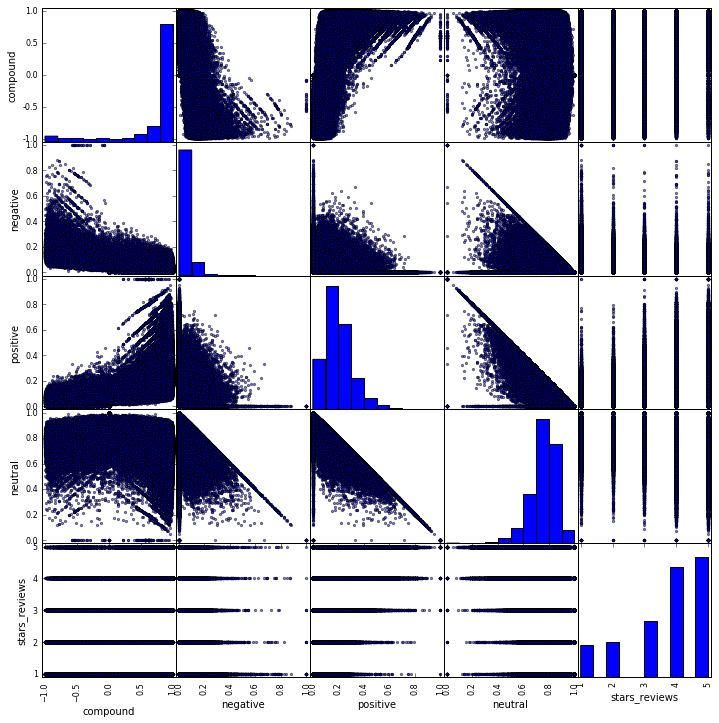

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

from pandas.tools.plotting import scatter_matrix
scat = scatter_matrix(data, figsize = (12,12))

In [9]:
# !pip install patsy
import statsmodels.api as sm

In [10]:
results = sm.OLS(y, X).fit()
# intercept, slope = results.params
# results.params
r2 = results.rsquared



In [11]:
p = figure(title='Price vs Sqft')
p.circle(x,y,color="blue",size=8)

x1 = range(min(x),max(x)+1)

# For loop:
y1 = []
for val in x1:
    y1.append(intercept + slope*val)
# This generates y1 again, but with one line of code instead
# List Comprehension:
y1 = [intercept + slope*val for val in x1]

p.line(x1,y1,color='red')

show(p)

NameError: name 'figure' is not defined

In [12]:
print results.summary()

                            OLS Regression Results                            
Dep. Variable:          stars_reviews   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 1.285e+06
Date:                Tue, 26 Jan 2016   Prob (F-statistic):               0.00
Time:                        11:09:12   Log-Likelihood:            -5.3186e+05
No. Observations:              370193   AIC:                         1.064e+06
Df Residuals:                  370189   BIC:                         1.064e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
compound       0.7584      0.005    159.128      0.0

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_validation import cross_val_score

In [16]:
from sklearn.cross_validation import train_test_split
# #Split our data
# X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

sk_lrn_model = LinearRegression()
# sk_lrn_model = DecisionTreeRegressor(max_features='sqrt')
# sk_lrn_model.fit(X_train, y_train)
scores = cross_val_score(sk_lrn_model, X, y, cv=10)
print scores
print scores.mean(), '+/-', scores.std()


[ 0.38015619  0.33110518  0.32309183  0.35473045  0.33807198  0.36714069
  0.36211078  0.32401679  0.37295756  0.40366478]
0.355704622864 +/- 0.0252036642467


0.409082385745


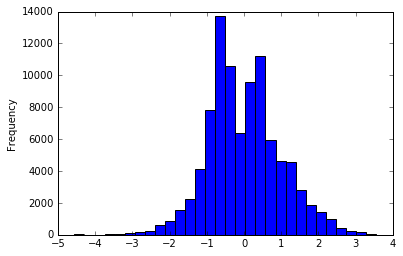

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)
sk_lrn_model.fit(X_train, y_train)
y_train_pred = sk_lrn_model.predict(X_train)
y_train_err = y_train - y_train_pred

second_model = KNeighborsRegressor(500)

second_model.fit(X_train, y_train_err)

y_pred = sk_lrn_model.predict(X_test) + second_model.predict(X_test)

from sklearn.metrics import r2_score

print r2_score(y_test.values, y_pred)

# plt.plot(y_pred-y_test, '.' )
(y_pred-y_test).plot(kind = 'hist', bins = 30)

In [94]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.ensemble import RandomForestRegressor

0.204559551546


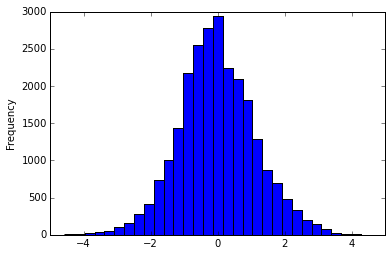

In [98]:
class WonderfulEnsemble(BaseEstimator, RegressorMixin):
    
    def __init__(self, neighbors=10):
        self.neighbors = neighbors
        
    def fit(self, X, y):
        self.lin = LinearRegression()
        self.lin.fit(X, y)
        ylin = self.lin.predict(X)
        yerr = y - ylin
        
        self.knn = KNeighborsRegressor(self.neighbors)
        self.knn.fit(X, yerr)
        yknn = self.knn.predict(X)
        
        self.rf = RandomForestRegressor()
        self.rf.fit(X, yerr)
        yrf = self.rf.predict(X)
        
        new_features = pd.DataFrame({
                "LIN": ylin,
                "KNN": yknn,
                "RF": yrf
            })
        
        self.linfinal = LinearRegression()
        self.linfinal.fit(new_features, y)
        
        return self
    
    def predict(self, X):
        ylin = self.lin.predict(X)
        yknn = self.knn.predict(X)
        yrf  = self.rf.predict(X)
        
        new_features = pd.DataFrame({
                "LIN": ylin,
                "KNN": yknn,
                "RF": yrf
            })
        return self.linfinal.predict(new_features)
        
we = WonderfulEnsemble()

we.fit(X_train, y_train)
y_pred = we.predict(X_test)

print r2_score(y_test.values, y_pred)

# plt.plot(y_pred-y_test, '.' )
(y_pred-y_test).plot(kind = 'hist', bins = 30)

In [ ]:
y_pred

In [89]:
y_pred

array([ 4.15120266,  4.24563646,  4.64943893, ...,  4.54502019,
        3.24525305,  3.39469753])

In [48]:
# sk_lrn_model.predict(X_train) - y_train 

In [64]:
# The coefficients
import numpy as np
print "Sklearn Model:"
print 'Intercept: {}'.format(sk_lrn_model.intercept_)
print 'Coefficients: {}'.format(sk_lrn_model.coef_)
# The mean square error
print("Residual sum of squares (Train): {0:.3f}".format(np.mean((sk_lrn_model.predict(X_train) - y_train) ** 2)))
print("Residual sum of squares (Test): {0:.3f}".format(np.mean((sk_lrn_model.predict(X_test) - y_test) ** 2)))

# Explained variance score: 1 is perfect prediction
print('Variance score: {0:.3f}'.format(sk_lrn_model.score(X_test, y_test)))

Sklearn Model:


AttributeError: 'DecisionTreeRegressor' object has no attribute 'intercept_'